Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import dataset

In [ ]:
dataset = pd.read_csv('house_prices.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]
 [1940    4]
 [2000    3]
 [1890    3]
 [4478    5]
 [1268    3]
 [2300    4]
 [1320    2]
 [1236    3]
 [2609    4]
 [3031    4]
 [1767    3]
 [1888    2]
 [1604    3]
 [1962    4]
 [3890    3]
 [1100    3]
 [1458    3]
 [2526    3]
 [2200    3]
 [2637    3]
 [1839    2]
 [1000    1]
 [2040    4]
 [3137    3]
 [1811    4]
 [1437    3]
 [1239    3]
 [2132    4]
 [4215    4]
 [2162    4]
 [1664    2]
 [2238    3]
 [2567    4]
 [1200    3]
 [ 852    2]
 [1852    4]
 [1203    3]]
[399900 329900 369000 232000 539900 299900 314900 198999 212000 242500
 239999 347000 329999 699900 259900 449900 299900 199900 499998 599000
 252900 255000 242900 259900 573900 249900 464500 469000 475000 299900
 349900 169900 314900 579900 285900 249900 229900 345000 549000 287000
 368500 329900 314000 299000 179900 299900 239500]


Split dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2526    3]
 [2040    4]
 [2637    3]
 [1200    3]
 [2400    3]
 [1852    4]
 [1458    3]
 [2300    4]
 [1100    3]
 [1320    2]
 [1664    2]
 [1767    3]
 [2238    3]
 [1380    3]
 [4478    5]
 [1985    4]
 [1236    3]
 [1811    4]
 [1268    3]
 [2132    4]
 [1427    3]
 [4215    4]
 [1600    3]
 [1890    3]
 [1437    3]
 [3890    3]
 [1534    3]
 [1962    4]
 [1239    3]
 [1888    2]
 [3031    4]
 [1494    3]
 [2162    4]
 [1203    3]
 [1416    2]
 [2104    3]
 [ 852    2]]
[[2200    3]
 [3137    3]
 [1839    2]
 [3000    4]
 [2609    4]
 [2000    3]
 [2567    4]
 [1000    1]
 [1604    3]
 [1940    4]]
[469000 314900 299900 299000 369000 299900 464500 449900 249900 299900
 368500 252900 329900 212000 699900 299900 199900 285900 259900 345000
 198999 549000 329900 329999 249900 573900 314900 259900 229900 255000
 599000 242500 287000 239500 232000 399900 179900]
[475000 579900 349900 539900 499998 347000 314000 169900 242900 239999]


Train regression model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

Make predictions

In [ ]:
predictions = regressor.predict(X_test)
print(predictions)

numtests = len(y_test)
print(np.concatenate((X_test, y_test.reshape(numtests, 1), predictions.reshape(numtests, 1)), 1).astype(int))

[331341.95 509772.   286487.9  519946.   373523.   324277.69 419916.
 241029.   329006.   279103.97]
[[  2200      3 475000 331341]
 [  3137      3 579900 509772]
 [  1839      2 349900 286487]
 [  3000      4 539900 519946]
 [  2609      4 499998 373523]
 [  2000      3 347000 324277]
 [  2567      4 314000 419916]
 [  1000      1 169900 241029]
 [  1604      3 242900 329006]
 [  1940      4 239999 279103]]


Evaluate regression model & plot regression

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
print(score)

0.5963976314367395


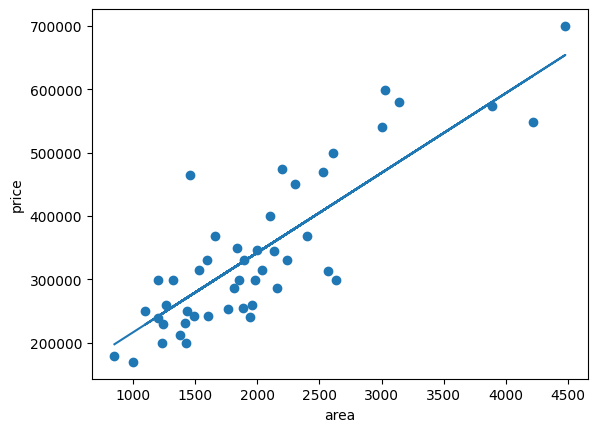

In [ ]:
area = dataset.iloc[:,0]
plt.scatter(area, y)
plt.xlabel("area")
plt.ylabel("price")

plt.plot(X_train[:,0], regressor.intercept_ + X_train[:, 0] * regressor.coef_[0])
plt.show()